<a href="https://colab.research.google.com/github/ToxicLattice383/Subjective-Answers-Evaluation/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.9/702.9 kB 11.5 MB/s eta 0:00:00


Dropdown(description='Message 1', options=('I like eating sushi because I love the texture of raw fish.', 'I b…

Dropdown(description='Message 2', options=('I like eating sushi because I love the texture of raw fish.', 'I b…

Button(description='Run', style=ButtonStyle())

Word Mover's Distance: 0.0000


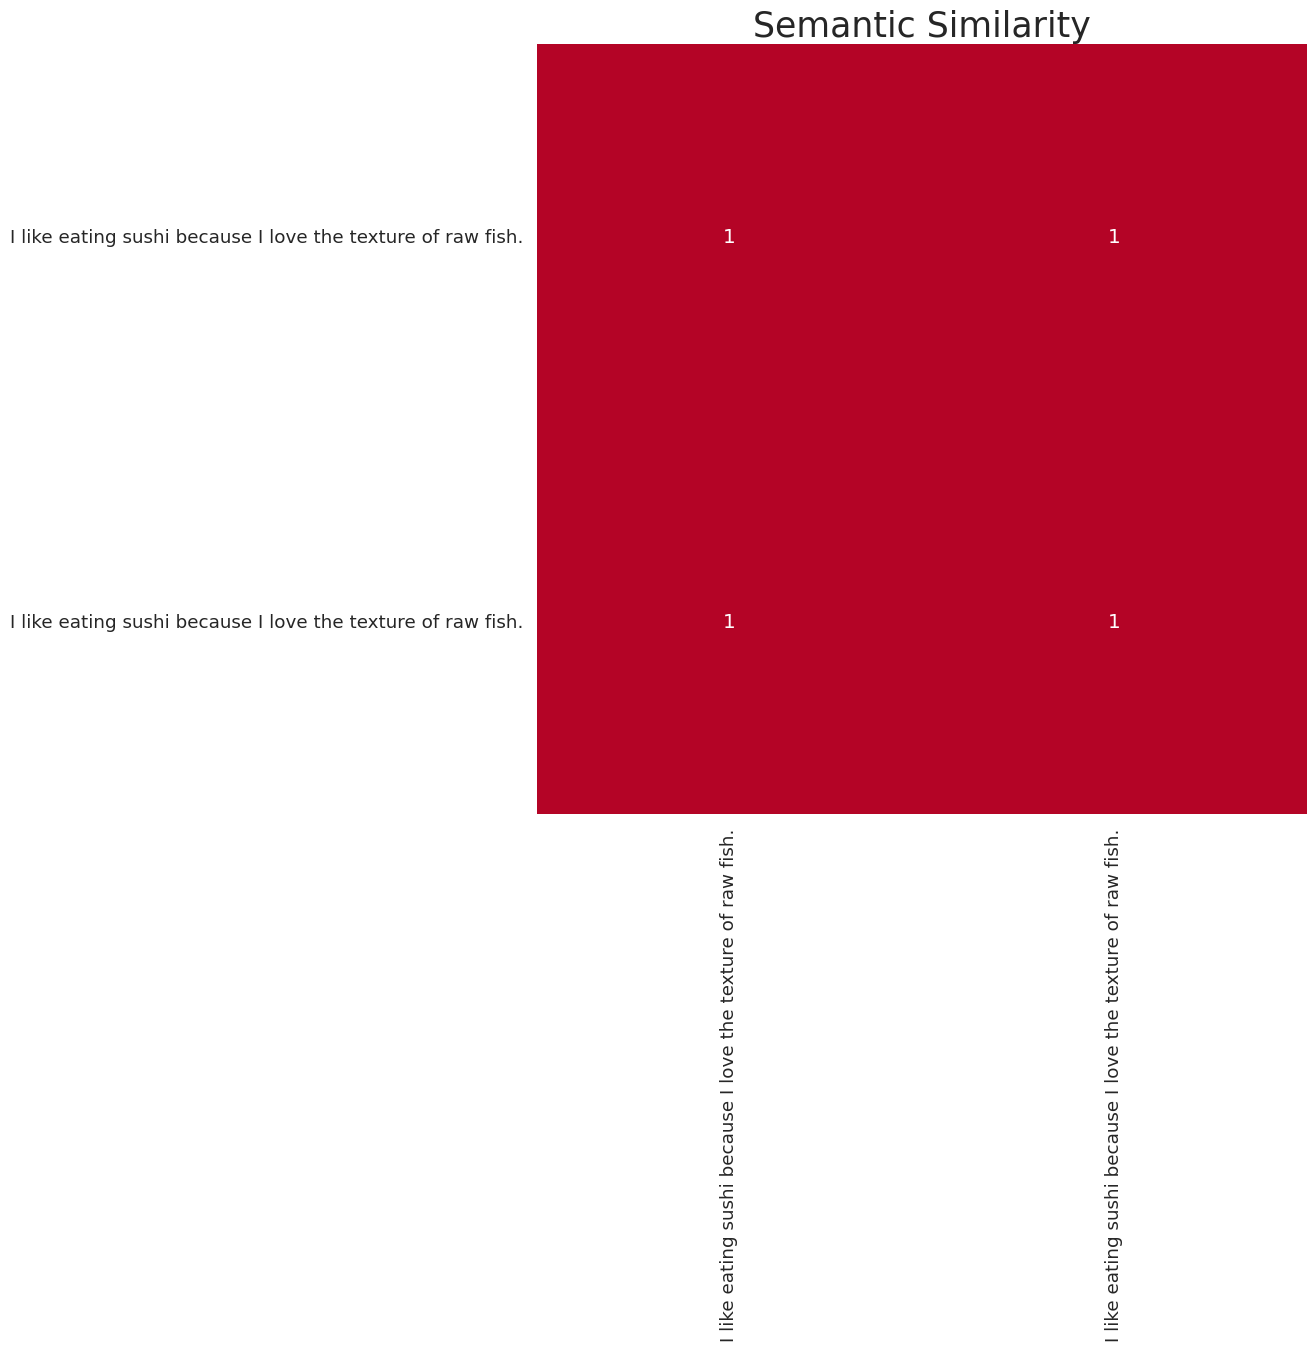

Word Mover's Distance: 1.3315


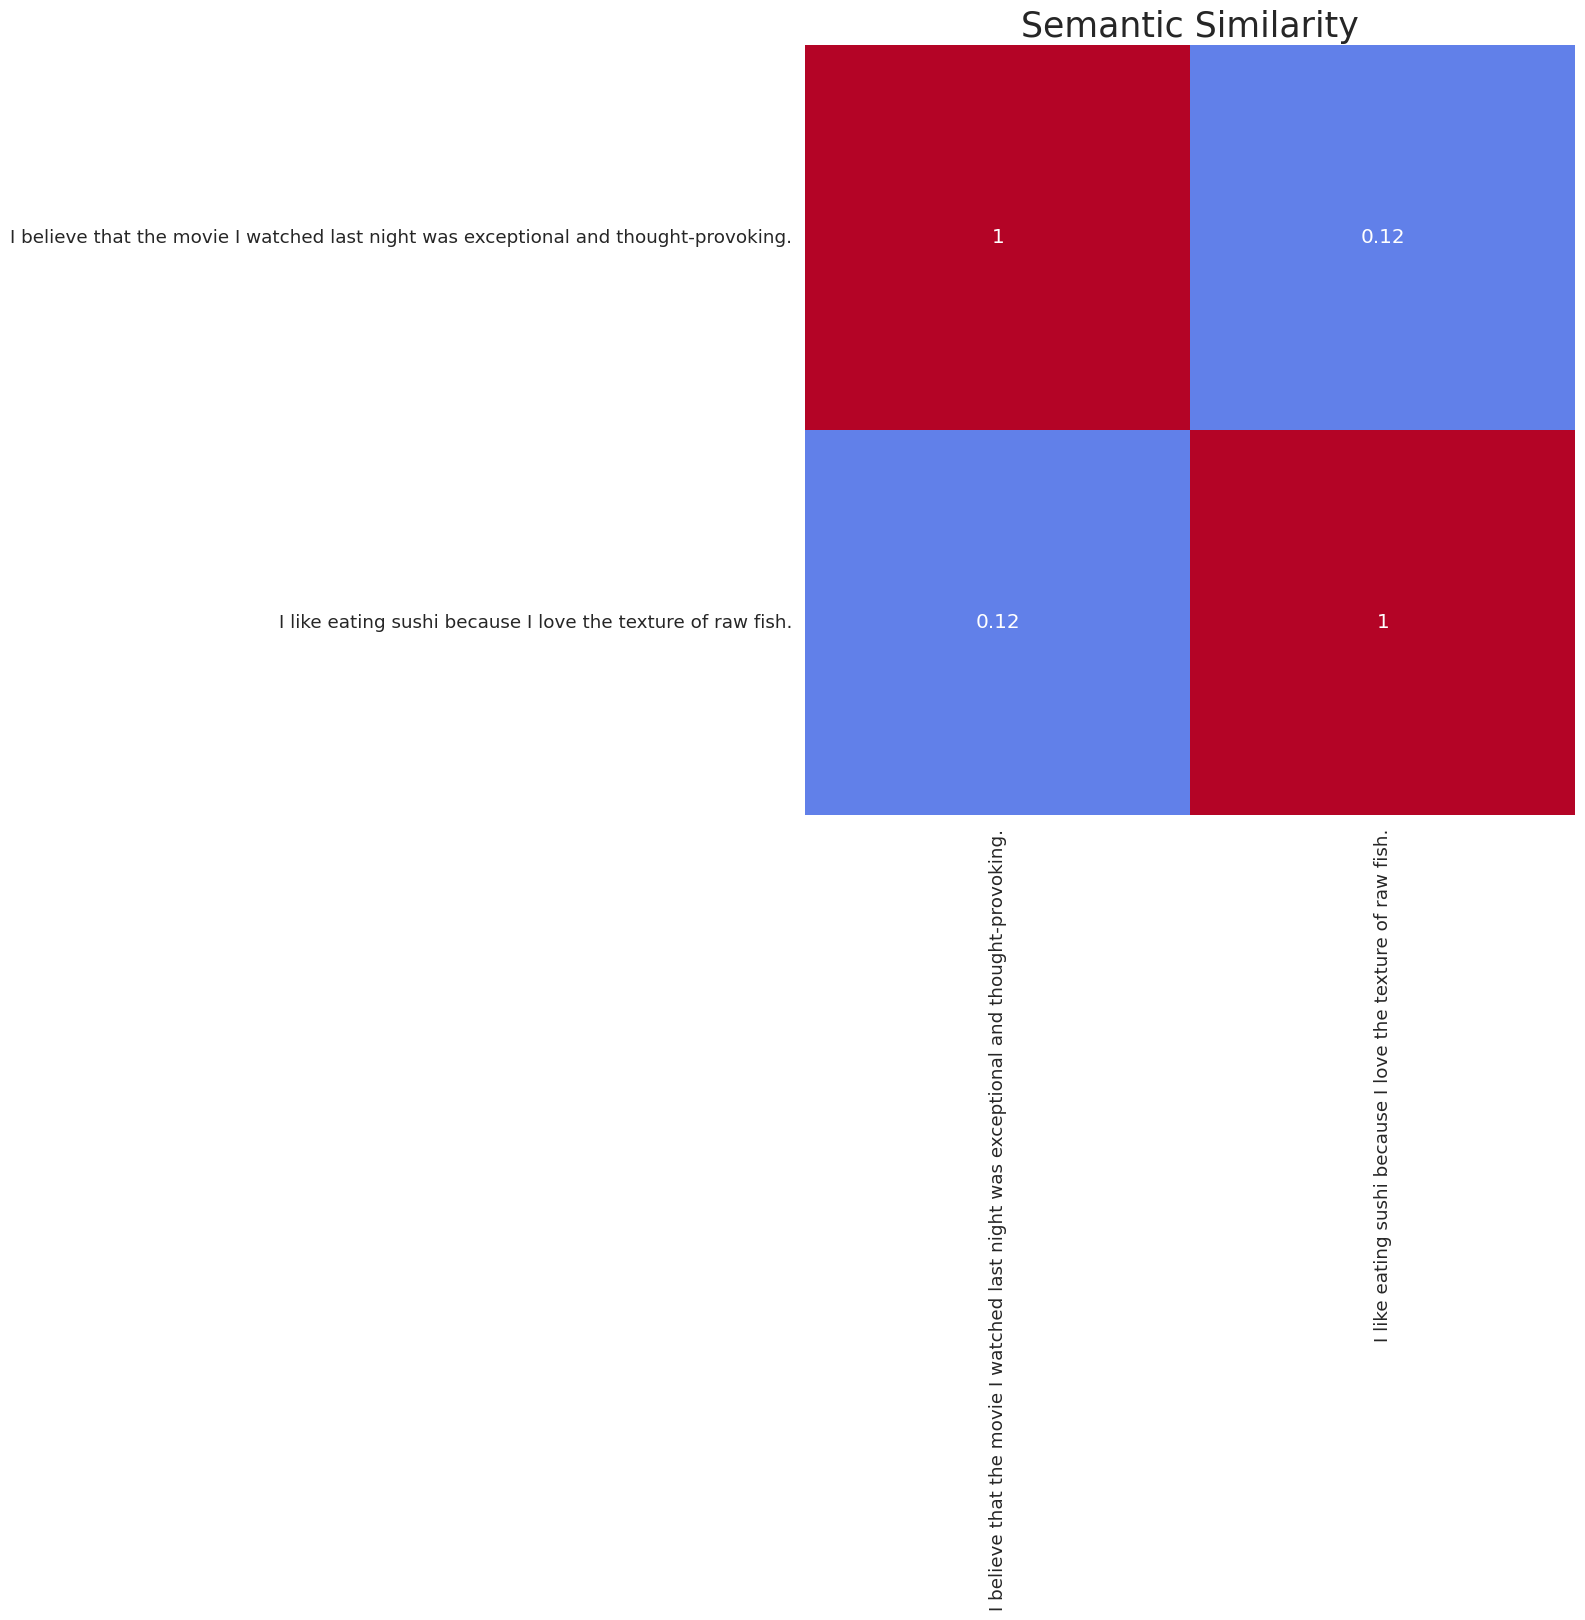

In [2]:
import numpy as np
import pandas as pd
import os
import gc
import re
import warnings
import nltk
nltk.download('stopwords')
nltk.download('punkt')
!pip install POT
warnings.filterwarnings("ignore")


# Plot
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_hub as hub

from IPython.display import display
import ipywidgets as widgets

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from gensim.models import Word2Vec

encoder_url = 'https://tfhub.dev/google/universal-sentence-encoder/4'  # Note that this is a 1GB Module
encoder = hub.load(encoder_url)

def embed(input):
    return encoder(input)

messages = ["I like eating sushi because I love the texture of raw fish.",
    "I believe that the movie I watched last night was exceptional and thought-provoking.",

    "I think that pets can bring a lot of joy and companionship to people's lives.",
    "Personally, I find the color blue to be calming and soothing.",

    "I think that traveling is one of the most enriching experiences a person can have.",
    "The novel I recently read was incredibly gripping and emotionally impactful.",

    "I consider spending time in nature to be a rejuvenating and spiritually uplifting activity.",
    "The concert I attended last week was absolutely phenomenal, with exceptional performances by the artists.",

    "For me, spending quality time with loved ones is the key to happiness and fulfillment.",
    "I feel that exercising regularly not only improves physical health but also boosts mental clarity and positivity.",
]

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    punctuations = set(string.punctuation)
    return [word.lower() for word in word_tokenize(text) if word.lower() not in stop_words and word not in punctuations]

corpus = [preprocess_text(doc) for doc in messages]

w2v_model = Word2Vec(corpus, vector_size=100, min_count=1)

def calculate_wmd_distance(doc1, doc2):
    doc1 = preprocess_text(doc1)
    doc2 = preprocess_text(doc2)
    return w2v_model.wv.wmdistance(doc1, doc2)

def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10, 10))
    g = sns.heatmap(corr, xticklabels=labels, yticklabels=labels,
                    vmin=0, vmax=1, cmap='coolwarm', robust=True, cbar=False, square=True, annot=True)
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Similarity", fontsize=25)

def run_and_plot(messages_):
    message_embeddings_ = embed(messages_)
    plot_similarity(messages_, message_embeddings_, 90)

def on_button_click(b):
    selected_messages = [dropdown1.value, dropdown2.value]
    wmd_distance = calculate_wmd_distance(selected_messages[0], selected_messages[1])
    print("Word Mover's Distance: {:.4f}".format(wmd_distance))
    run_and_plot(selected_messages)

dropdown1 = widgets.Dropdown(options=messages, description='Message 1')
dropdown2 = widgets.Dropdown(options=messages, description='Message 2')
button = widgets.Button(description='Run')
button.on_click(on_button_click)
display(dropdown1)
display(dropdown2)
display(button)


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
!pip install POT


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.9/702.9 kB 11.5 MB/s eta 0:00:00
